<a href="https://colab.research.google.com/github/1lamoyspencer/FDSFE_LSpencer/blob/main/Class_demo6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/fedhere/FDSFE_FBianco/main/data/walkingspeed_Bettencourt07.csv',header=None, names=["population", "wspeed","city"])

In [4]:
df

,population,wspeed,city
0,2520.0,2.28,Itea
1,370.0,2.79,Psychro
2,5650.0,3.37,Netanya
3,14100.0,3.76,Corte
4,23300.0,3.31,Safed
5,52600.0,4.91,Dimona
6,73300.0,4.40,Netanya
7,77100.0,3.90,New Haven
8,145000.0,4.40,Jerusalem
9,320000.0,4.49,Brno


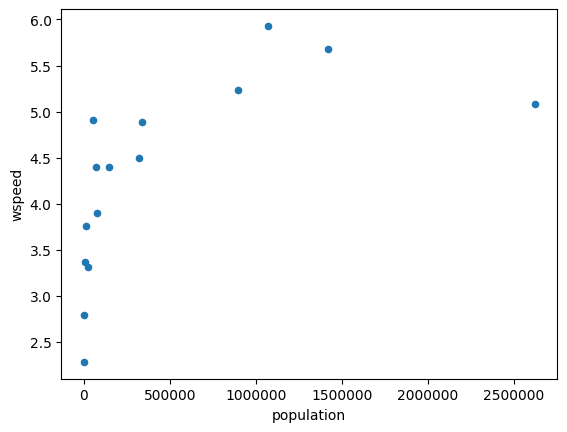

In [5]:
ax=df.plot("population", "wspeed", kind="scatter")
ax.ticklabel_format(style="plain")

In [6]:
import numpy as np
df["population"]=np.log10(df["population"])

Text(0.5, 0, 'Log10 population')

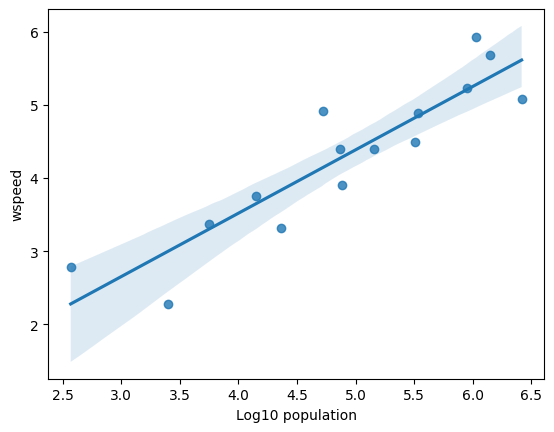

In [11]:
import seaborn as sns
ax=sns.regplot(x=df["population"], y=df["wspeed"])
ax.set_xlabel("Log10 population")

In [12]:
def line (x,slope,intercept):
    y= slope*x+intercept
    return y
def SSE (y, ypred):
    return ((y-ypred)**2).sum()

In [17]:
current_min_see = float('inf')

for slope in np.arange(0,3,0.1):
  for intercept in np.arange(0,3,0.1):
    prediction= line(df["population"], slope, intercept)
    sse=SSE(df["wspeed"], prediction)

    if sse<current_min_see:
      current_min_see=sse
      manual_slope=slope
      manual_intercept=intercept

print(f"Best slope: {manual_slope:.2f}")
print(f"Best intercept: {manual_intercept:.2f}")

Best slope: 0.80
Best intercept: 0.40


In [19]:
df["prediction_manual"]=line(df["population"], manual_slope, manual_intercept)

In [20]:
manual_min_sse=SSE(df["wspeed"], df["prediction_manual"])
print(f"Minimum Sum of Squared Errors achieved: {manual_min_sse:.2f}")

Minimum Sum of Squared Errors achieved: 2.84


Text(0, 0.5, 'Walking Speed (ft/s)')

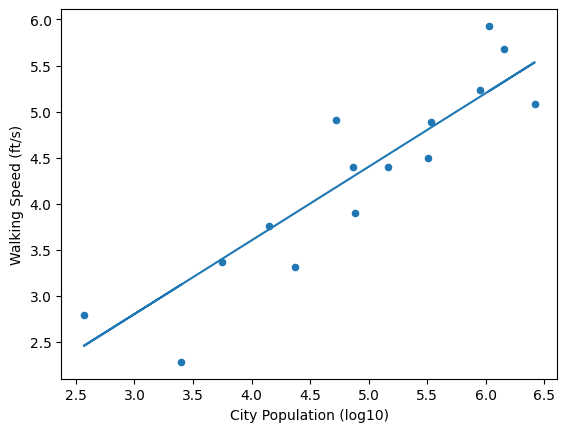

In [23]:
ax=df.plot("population", "wspeed", kind="scatter")
ax.plot(df["population"], df["prediction_manual"])
ax.set_xlabel("City Population (log10)")
ax.set_ylabel("Walking Speed (ft/s)")

In [29]:
numpy_slope, numpy_intercept= np.polyfit(df["population"], df["wspeed"], 1)

print (f"Numpy slope: {numpy_slope:.3f}")
print (f"Numpy intercept: {numpy_intercept:.3f}")

Numpy slope: 0.865
Numpy intercept: 0.057


Text(0, 0.5, 'Walking Speed (ft/s)')

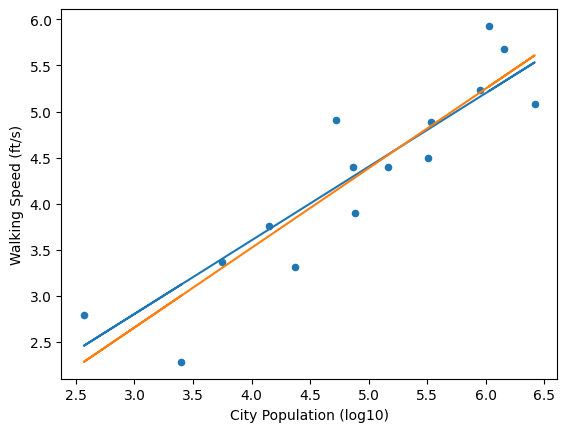

In [30]:
df["prediction_numpy"]=line(df["population"], numpy_slope, numpy_intercept)

ax=df.plot("population", "wspeed", kind="scatter")
ax.plot(df["population"], df["prediction_manual"])
ax.plot(df["population"], df["prediction_numpy"])

ax.set_xlabel("City Population (log10)")
ax.set_ylabel("Walking Speed (ft/s)")

In [33]:
from sklearn.linear_model import LinearRegression

reg= LinearRegression().fit(df[["population"]].values.reshape(-1,1), df["wspeed"])

In [34]:
score=reg.score(df[["population"]].values.reshape(-1,1), df["wspeed"])
print(f"Score of linear regression from sklearn: {score:.2f}")


Score of linear regression from sklearn: 0.82


In [35]:
df["prediction_sklearn"]=reg.predict(df[["population"]].values.reshape(-1,1))

Text(0, 0.5, 'Walking Speed (ft/s)')

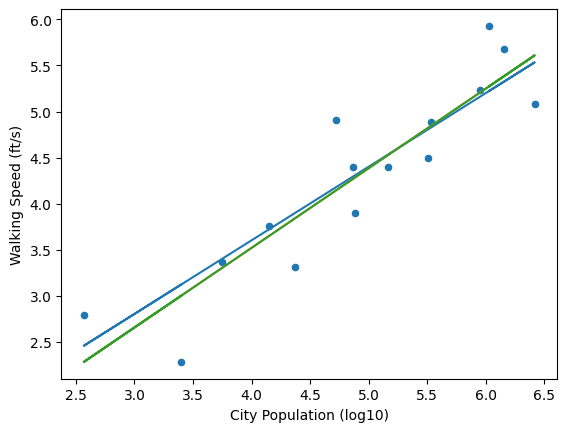

In [36]:
ax=df.plot("population", "wspeed", kind="scatter")
ax.plot(df["population"], df["prediction_manual"])
ax.plot(df["population"], df["prediction_numpy"])
ax.plot(df["population"], df["prediction_sklearn"])

ax.set_xlabel("City Population (log10)")
ax.set_ylabel("Walking Speed (ft/s)")